In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Loading and preprocessing the image data

mnist=tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test)=mnist.load_data()
input_shape=(28,28,1)     #The number of color channels. Since this is a grayscale image, there’s only one channel. For color images, this number would be 3 (for RGB).

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#The model expects a 4D tensor input, so each 2D image (28x28)

x_train=x_train.reshape(x_train.shape[0],28,28,1)  #(60000, 28, 28)  Changes x_train from a shape of (60000, 28, 28) to (60000, 28, 28, 1), adding an extra dimension for the color channel.
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
#making sure that the values are in float so that we can get decimal points after division as it is required by tensorflow

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [ ]:
#Normalizing the RGB codes
#Divides the pixel values by 255 to scale them to a range of 0–1. This helps improve the training performance by standardizing the input data.

x_train=x_train/255
x_test=x_test/255

In [ ]:
#Defining the model architecture

#RELU:f(x)=max(0,x) This means that if the input value +ve it returns x , if -ve it returns 0
#Softmax:The softmax function converts a vector of values into a probability distribution.
# This means each output is transformed into a probability between 0 and 1, and the sum of all probabilities is 1.


#filter:The matrix of weights that detect specific patterns in the input.
#Kernel Size: The height and width of each filter,


model=Sequential()      # Creates a linear stack of layers.
model.add(Conv2D(28,kernel_size=(3,3), input_shape=input_shape))    #28 filters and a 3x3 kernel size, which detects local features like edges and textures in the image
model.add(MaxPooling2D(pool_size=(2,2)))                            #Reduces the spatial dimensions of the output
model.add(Flatten())      #converting it to vector [Converts the 2D output from the convolutional layers into a 1D vector, preparing it for the dense (fully connected) layers.]
model.add(Dense(200,activation='relu'))   # fully connected layer with 200 neurons and a ReLU activation function. ReLU introduces non-linearity and helps the model learn complex patterns.
model.add(Dropout(0.3))       #Drops 30% neurons to prevent overfitting.
model.add(Dense(10, activation='softmax'))  #softmax ensures the output values are probabilities, summing to 1.

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │         946,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 948,890 (3.62 MB)

 Trainable params: 948,890 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training the mode;

#optimizer is an algorithm to minimize the loss function[ difference between the model’s predictions and actual target values]
#Optimizers use backpropagation to calculate gradients to adjust each parameter (weight or bias) to minimize the loss.
#adam: Adaptive Moment Estimation[Minimizes loss by adjusting weights]
#First Moment (Mean of Gradients): Tracks the mean of the gradients, capturing the direction in which the loss has been decreasing.
#Second Moment (Variance of Gradients): Tracks the squared gradients to adapt the learning rate based on the magnitude of updates.


#sparse_categorical_crossentropy: loss function commonly used in classification tasks where the target labels are integers representing class indices
#calculates the negative log probability of the correct class, so minimizing this loss function encourages the model to assign high probabilities to the correct class.
#directly uses integer class labels (e.g., 1 for class 1).

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2)  #Specifies the number of times the entire dataset should be processed


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.8895 - loss: 0.3585
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9718 - loss: 0.0916


In [ ]:
#Estimating the model

test_loss, test_acc=model.evaluate(x_test, y_test)
print("Loss=%0.3f" %test_loss)
print("Accuracy=%0.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9771 - loss: 0.0721
Loss=0.060
Accuracy=0.981


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Actual Number: 3
Predicted Number: 3


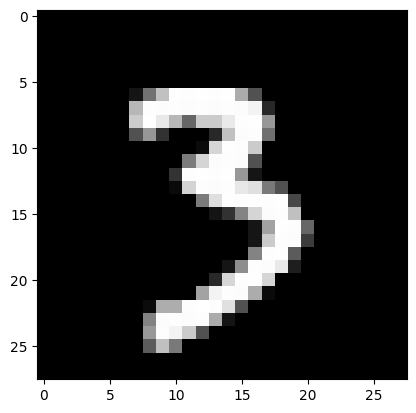

In [ ]:
n = 30
plt.imshow(x_test[n].reshape(28, 28), cmap='gray')
predicted_value = model.predict(x_test)
print("Actual Number:", y_test[n])
print("Predicted Number:", np.argmax(predicted_value[n]))   # predicted probability vector for the 20th test image.Each element in this vector represents the probability of each class

# Finds the index with the highest probability, which represents the model’s predicted digit.